Эта небольшая работа представляет собой анализ данных мобильного оператора N, а также предсказание оттока клиентов этой самой конторы. Оригинальный датасет лежит в репозитории.

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных

Познакомимся с датасетом: проверим наличие пропусков, установим типы данных.

In [2]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 121MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 84.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 31.0MB/s]


In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
# Случайные десять строк
data.sample(n = 10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3349,55,45.05,2462.6,Female,0,No,No,Yes,No,DSL,No,No,No,No,No,No,One year,No,Bank transfer (automatic),0
2806,67,85.25,5714.2,Female,0,No,No,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,0
4284,67,109.40,7281.6,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,0
3775,2,45.25,85.5,Female,0,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
2607,72,85.10,6155.4,Female,0,Yes,No,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,0
4525,72,115.80,8476.5,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
4327,71,109.70,7904.25,Female,1,Yes,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
2142,7,20.45,150.75,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
2503,10,49.55,475.7,Male,0,Yes,Yes,Yes,No,DSL,No,Yes,No,No,No,No,One year,No,Mailed check,0
1598,58,19.55,1079.65,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0


In [8]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [10]:
# Странно, что объекты TotalSpent выдаются за строки...
# Изменим тип элементов на вещественное число
# Пустые строки заменим на нули
data['TotalSpent'] = data['TotalSpent'].replace(' ', '0').astype(float)

## Анализ данных


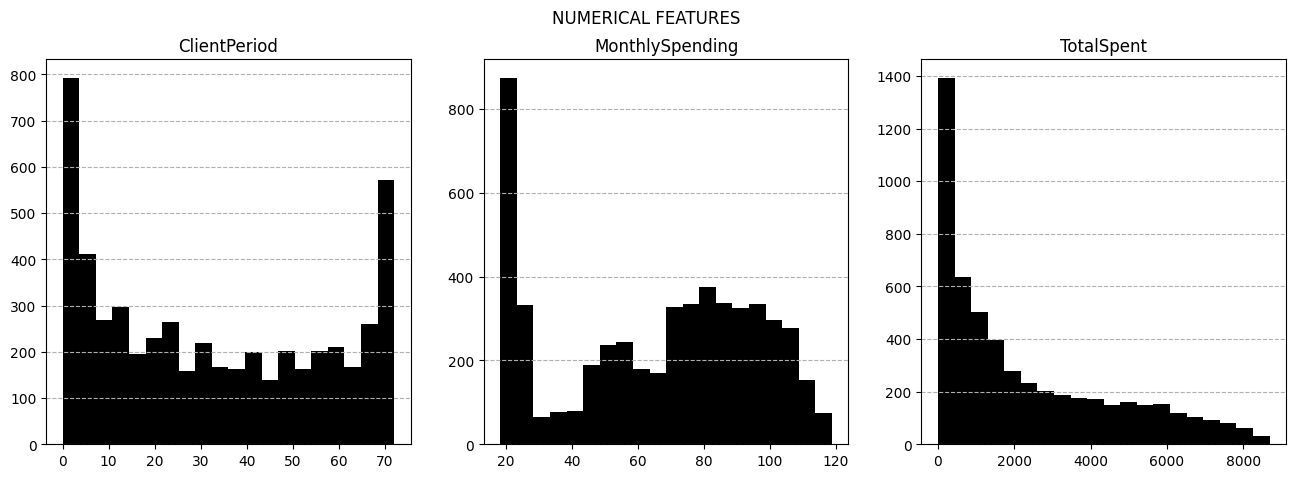

In [51]:
# Полюбуемся числовыми признаками
plt.figure(figsize=(16, 5))
plt.suptitle("NUMERICAL FEATURES")
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i + 1)
    plt.title(col)
    plt.grid(axis='y', linestyle='--')
    plt.hist(data[col], bins = 20, color='black')

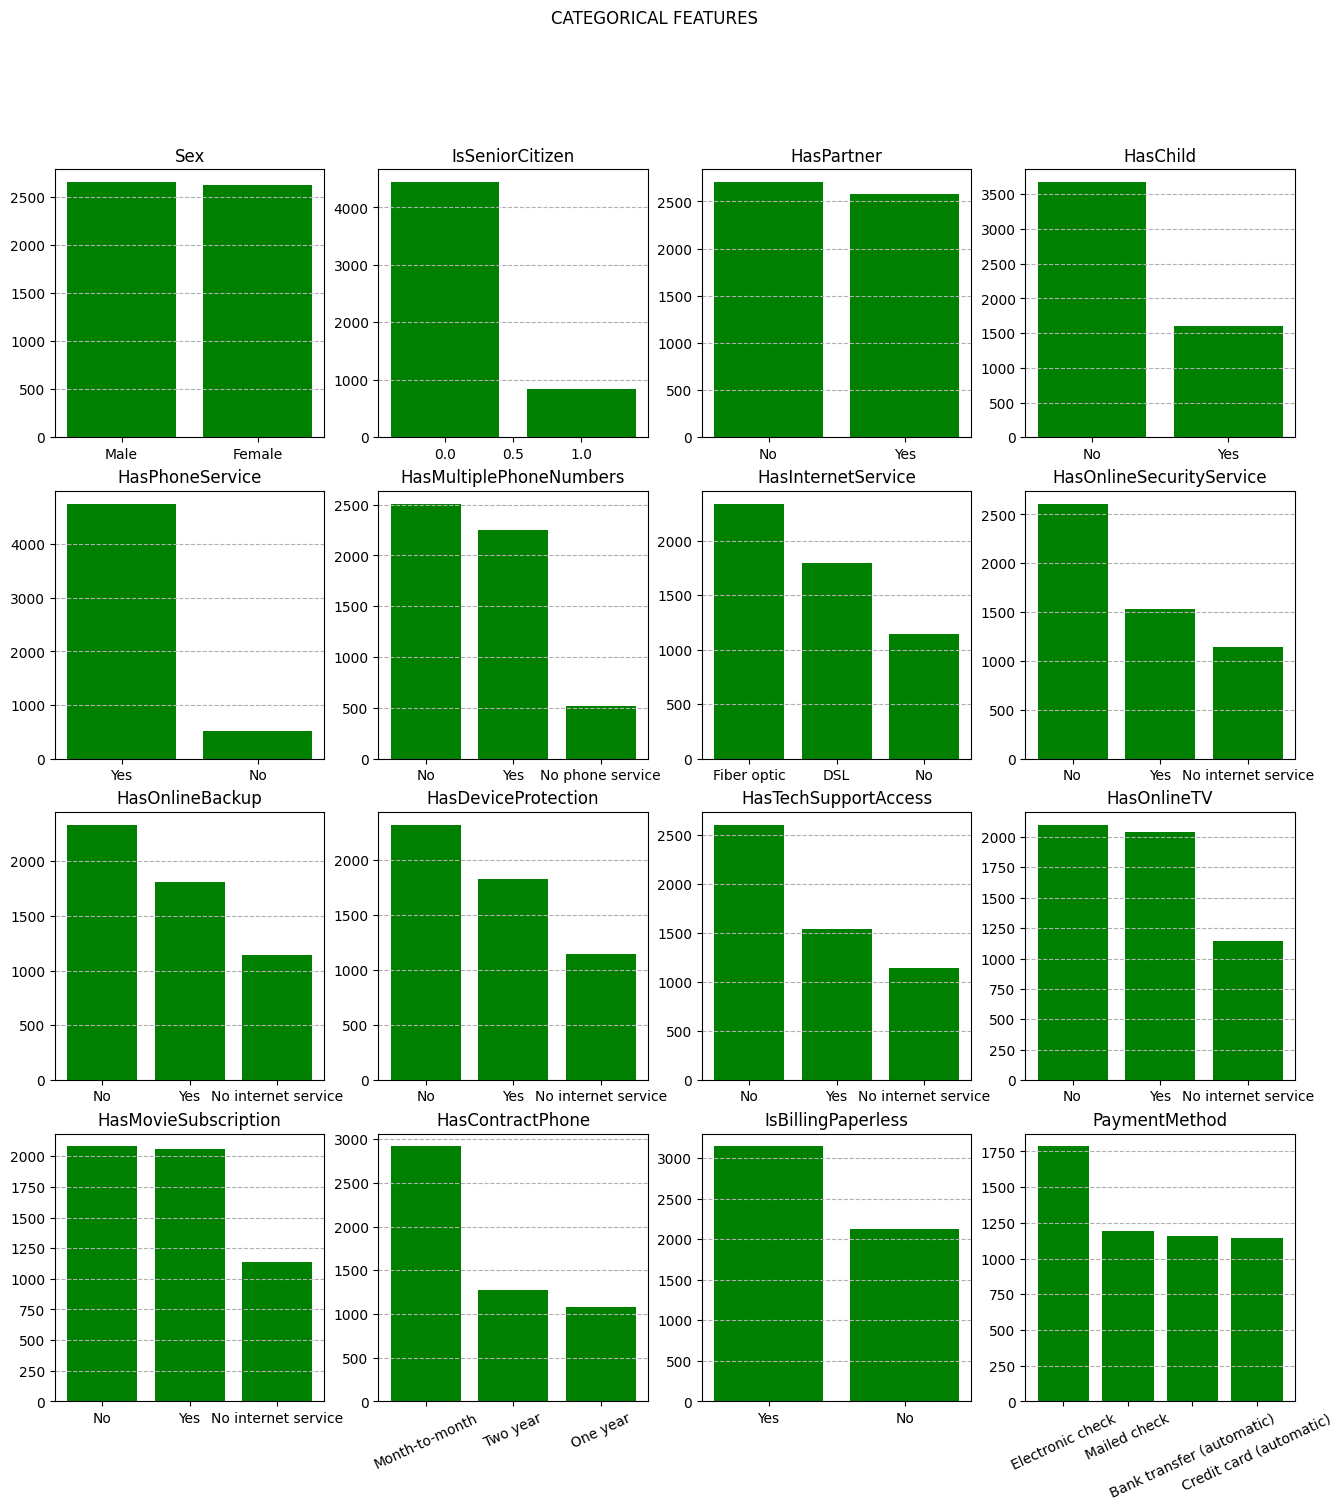

In [17]:
# И про категориальные не забудем
plt.figure(figsize=(16, 16))
plt.suptitle("CATEGORICAL FEATURES")
for i, col in enumerate(cat_cols):
    plt.subplot(4, 4, i + 1)
    plt.title(col)

    if i in [13, 15]:
        plt.xticks(rotation=25)

    plt.grid(axis='y', linestyle='--')
    plt.bar(data[col].value_counts().index, data[col].value_counts(), color='green')

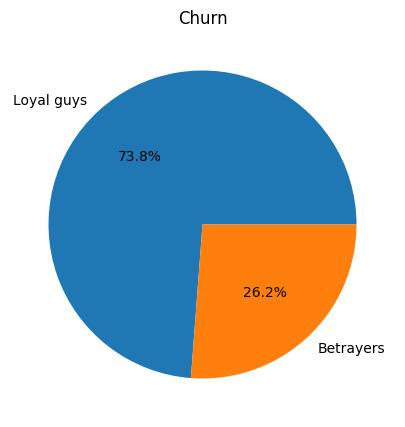

In [32]:
# Проверим сбалансированность целевой переменной
plt.figure(figsize=(8, 5))
plt.title("Churn")
labels = ['Loyal guys', 'Betrayers']
plt.pie(data['Churn'].value_counts(), labels = labels, autopct='%1.1f%%')
plt.show()

Сразу заметим, что целевая переменная распределена неравномерно, поэтому, [следуя классикам](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii#binarnaya-klassifikacziya-metki-klassov), в качестве метрике будем использовать ROC-AUC вместо accuracy

## Применение линейных моделей

1) Как известно, нормировка данных критически важна для нормальной работы линейных моделей, поэтому и не забудем ее применить.

2) Категориальные переменные, разумеется, закодируем (хотя бы и OneHot'ом).

3) Для более точного подбора гиперпарметров воспользуемся кросс-валидацией, благо она очень удобно реализована для GridSearch'а.

4) Чтобы код был удобнее/понятнее/нагляднее (нужное подчеркнуть), завернем все в трансформеры и пайплайны



In [33]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer

In [52]:
X_data, y_data = data.iloc[:,:-1], data.iloc[:,-1]
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_data, y_data, train_size=0.8, random_state=50)

# Трансофрмер столбцов
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',StandardScaler(),num_cols),
    ('cat_pipeline',OneHotEncoder(),cat_cols)
    ], n_jobs=-1)

# Пайплайн трансформера с логистической регрессией
clf = LogisticRegression()
clf_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', clf)
])

# GridserachCV с 5-ю фолдами
searcher = GridSearchCV(clf_pipeline,
                        param_grid={'model__C': [100, 10, 1, 0.1, 0.01, 0.001]},
                        scoring='roc_auc',
                        refit=True,
                        cv=5,
                        verbose=10)
searcher.fit(X_train_grid, y_train_grid)
y_pred_grid = searcher.predict_proba(X_test_grid)[:, 1]
best_param_C_grid = searcher.best_params_['model__C']

################################################################################
################################################################################
################################################################################

# OneHotEncoding
onehotcoder = OneHotEncoder()
X_cat = onehotcoder.fit_transform(X_cat).toarray()

# Scaling
scaler = StandardScaler()
X_num = scaler.fit_transform(data[num_cols])

X_data = np.concatenate((X_cat, X_num), axis=1)
y_data = data.iloc[:,-1]
X_train_LGCV, X_test_LGCV, y_train_LGCV, y_test_LGCV = train_test_split(X_data, y_data, test_size=0.2, random_state=50)

clf = LogisticRegressionCV(cv=5, scoring='roc_auc', refit=True).fit(X_train_LGCV, y_train_LGCV)
y_pred_LGCV = clf.predict_proba(X_test_LGCV)[:, 1]

best_param_C_LGCV = int(clf.C_[0])

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START model__C=100................................................
[CV 1/5; 1/6] END .................model__C=100;, score=0.839 total time=   3.7s
[CV 2/5; 1/6] START model__C=100................................................
[CV 2/5; 1/6] END .................model__C=100;, score=0.855 total time=   0.5s
[CV 3/5; 1/6] START model__C=100................................................
[CV 3/5; 1/6] END .................model__C=100;, score=0.849 total time=   0.4s
[CV 4/5; 1/6] START model__C=100................................................
[CV 4/5; 1/6] END .................model__C=100;, score=0.851 total time=   0.1s
[CV 5/5; 1/6] START model__C=100................................................
[CV 5/5; 1/6] END .................model__C=100;, score=0.834 total time=   0.1s
[CV 1/5; 2/6] START model__C=10.................................................
[CV 1/5; 2/6] END ..................model__C=10;,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 2/5; 2/6] END ..................model__C=10;, score=0.857 total time=   0.2s
[CV 3/5; 2/6] START model__C=10.................................................
[CV 3/5; 2/6] END ..................model__C=10;, score=0.849 total time=   0.2s
[CV 4/5; 2/6] START model__C=10.................................................


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[CV 4/5; 2/6] END ..................model__C=10;, score=0.850 total time=   0.2s
[CV 5/5; 2/6] START model__C=10.................................................
[CV 5/5; 2/6] END ..................model__C=10;, score=0.834 total time=   0.2s
[CV 1/5; 3/6] START model__C=1..................................................
[CV 1/5; 3/6] END ...................model__C=1;, score=0.839 total time=   0.2s
[CV 2/5; 3/6] START model__C=1..................................................
[CV 2/5; 3/6] END ...................model__C=1;, score=0.859 total time=   0.2s
[CV 3/5; 3/6] START model__C=1..................................................
[CV 3/5; 3/6] END ...................model__C=1;, score=0.848 total time=   0.1s
[CV 4/5; 3/6] START model__C=1..................................................
[CV 4/5; 3/6] END ...................model__C=1;, score=0.849 total time=   0.2s
[CV 5/5; 3/6] START model__C=1..................................................
[CV 5/5; 3/6] END ..........

In [53]:
print(f"Лучший параметр для GridSearchCV: {best_param_C_grid}, результат: {roc_auc_score(y_test_grid, y_pred_grid)}")
print(f"Лучший параметр для LogisticRegressionCV: {best_param_C_LGCV}, результат: {roc_auc_score(y_test_LGCV, y_pred_LGCV)}")

Лучший параметр для GridSearchCV: 10, результат: 0.8420735512986701
Лучший параметр для LogisticRegressionCV: 2, результат: 0.8425872581496952


## Применение градиентного бустинга

Попробуем улучшить результат с помощью градиентного бустинга. Для этого воспользуемся библиотекой CatBoost.


In [36]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.3 MB/s eta 0:00:00


In [40]:
from catboost import CatBoostClassifier

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], train_size = 0.8, random_state=50)

cb = CatBoostClassifier()
cb.fit(X_train, y_train, cat_features=cat_cols, verbose=False);

preds = cb.predict_proba(X_test)[:,1]
roc_auc_score(y_test, preds)

0.8446900955398723

попробуем найти оптимальные гиперпараметры

In [56]:
cb_model = CatBoostClassifier(
    loss_function='Logloss',
    cat_features=cat_cols,
    random_seed = 50,
    eval_metric='AUC',
    verbose=False)

In [57]:
catboost = cb_model.grid_search({'l2_leaf_reg': [0.1, 0.5, 1, 5, 10],
                      'max_depth': [3],
                      'n_estimators': [50, 100, 300],
                      'learning_rate': np.linspace(0.01, 0.2, 10)},
                      X_train,
                      y_train,
                      refit=True)


bestTest = 0.8221050989
bestIteration = 49

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8221051	best: 0.8221051 (0)	total: 370ms	remaining: 55.1s

bestTest = 0.8289319249
bestIteration = 49

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8289319	best: 0.8289319 (1)	total: 773ms	remaining: 57.2s

bestTest = 0.8341504725
bestIteration = 44

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8341505	best: 0.8341505 (2)	total: 1.17s	remaining: 57.4s

bestTest = 0.8382101682
bestIteration = 49

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8382102	best: 0.8382102 (3)	total: 1.54s	remaining: 56.3s

bestTes

In [58]:
catboost['params']

{'depth': 3, 'learning_rate': 0.2, 'l2_leaf_reg': 0.1, 'iterations': 100}

In [59]:
best_cb_model = CatBoostClassifier(
    depth=3,
    iterations=100,
    eval_metric='AUC',
    l2_leaf_reg=0.1,
    learning_rate=0.2,
    loss_function='Logloss',
    cat_features=cat_cols,
    random_seed=50,
    verbose = False)

In [60]:
best_cb_model.fit(X_train, y_train)
pred_train = best_cb_model.predict_proba(X_train)[:,1]

roc_auc_score(y_train, pred_train)

0.863535403321379

Как и следовало ожидать, градиентный бустинг повысил итоговый результат